Just taking a little bit of data and following this example: https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Jan2013_Bainbridge_WeekOne.csv')

In [3]:
df.rename(columns={'timestamp':'ds','seconds_late':'y'}, inplace=True)

In [12]:
df.head()

,ds,y
0,2013-01-01 00:55:00,656
1,2013-01-01 05:20:00,-59
2,2013-01-01 07:55:00,49
3,2013-01-01 08:45:00,3019
4,2013-01-01 09:40:00,0


In [5]:
m = Prophet()
m.fit(df)

C:\Users\Keith\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\Keith\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [13]:
future = m.make_future_dataframe(periods=1, freq = "H")
future.tail()

,ds
85,2013-01-04 20:55:00
86,2013-01-04 21:45:00
87,2013-01-04 22:35:00
88,2013-01-05 00:55:00
89,2013-01-05 01:55:00


In [28]:
d = {'ds': ["2013-01-05 05:20:00", "2013-01-05 07:55:00"]}
test = pd.DataFrame(data=d)

In [29]:
test

,ds
0,2013-01-05 05:20:00
1,2013-01-05 07:55:00


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2013-01-04 20:55:00,-57.202091,-528.961584,386.288633
86,2013-01-04 21:45:00,-61.945856,-480.205858,388.292405
87,2013-01-04 22:35:00,-47.788375,-475.954706,418.278166
88,2013-01-05 00:55:00,-33.133125,-493.038393,408.955472
89,2013-01-05 01:55:00,-87.304288,-509.968789,349.929740


In [32]:
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-05 05:20:00,-209.103439,-696.715321,221.280863
1,2013-01-05 07:55:00,100.450259,-377.473573,553.426700


In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-05 05:20:00,-48.522826,-696.715321,221.280863,-48.525772,-48.52001,-160.580613,-160.580613,-160.580613,-160.580613,-160.580613,-160.580613,0.0,0.0,0.0,-209.103439
1,2013-01-05 07:55:00,-58.110349,-377.473573,553.426700,-58.116552,-58.10366,158.560608,158.560608,158.560608,158.560608,158.560608,158.560608,0.0,0.0,0.0,100.450259


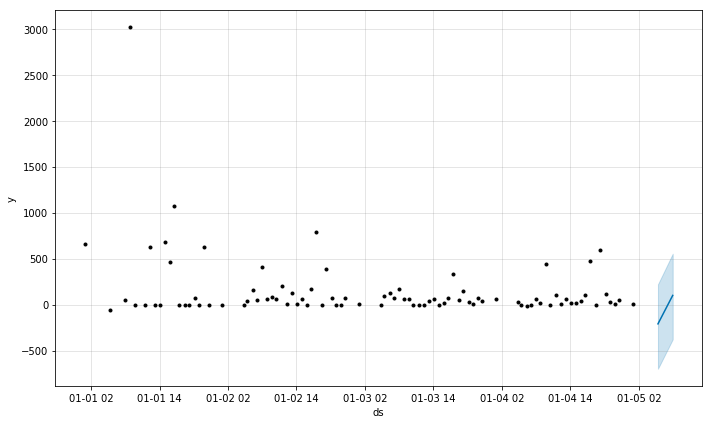

In [33]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig1 = m.plot(forecast)
fig1

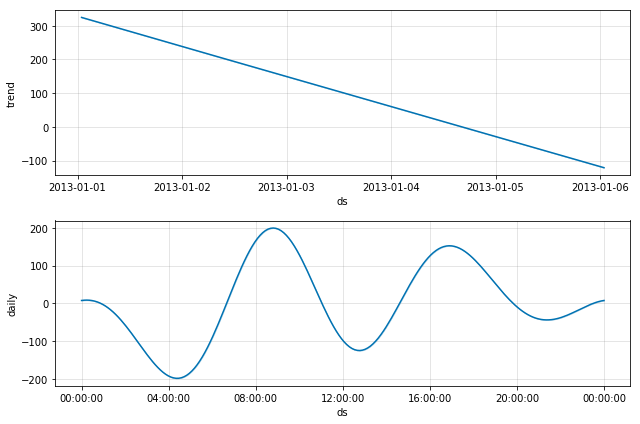

In [9]:
fig2 = m.plot_components(forecast)
fig2

Now I want to save this model and be able to load it back in. Following <a href = "https://github.com/facebook/prophet/issues/725">this</a>.

In [13]:
import pickle
pkl_path = "fb-prophet-1.pkl"

with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)
    
#forecast.to_pickle("path/to/data/forecast.pkl")

In [14]:
with open(pkl_path, 'rb') as f:
    m_2 = pickle.load(f)

In [17]:
forecast_2 = m_2.predict(future)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01 00:55:00,323.791963,-97.903009,778.040368
1,2013-01-01 05:20:00,147.733614,-303.744361,594.829602
2,2013-01-01 07:55:00,457.235820,32.011580,896.920449
3,2013-01-01 08:45:00,494.945624,50.558390,932.719334
4,2013-01-01 09:40:00,453.310007,2.501714,887.425349
5,2013-01-01 11:30:00,231.885397,-226.552290,646.075571
6,2013-01-01 12:20:00,166.034240,-269.214238,589.796911
7,2013-01-01 13:10:00,161.837010,-258.707681,626.140477
8,2013-01-01 14:05:00,222.012496,-205.546349,649.531640
9,2013-01-01 14:55:00,305.109513,-139.600503,755.363561
